In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
plt.style.use('seaborn')
%matplotlib inline

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)



df_indicadores = pd.read_parquet(f'../data/processed/df_indicadores.parquet')

df_final_pob = pd.read_parquet('../data/processed/df_final_pob.parquet')


In [50]:
pd.set_option('display.max_rows', 0)

df_final_pob


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Abastecimiento domiciliario de agua potable,"Abastos, mercados, lonjas",Acceso a los núcleos de población,Actividades funerarias,Alcantarillado,Alumbrado público,Biblioteca pública,Cementerio,Comercio ambulante,Conservación y rehabilitación de la edificación,"Conservación, mantenimiento y vigilancia de los edificios de titularidad local destinados a centros públicos de educación infantil, de educación primaria o de educación especial",Cooperar con las Administraciones educativas correspondientes en la obtención de los solares necesarios para la construcción de nuevos centros docentes,Equipamientos culturales,Evacuación y tratamiento de aguas residuales,Evaluación e información de situaciones de necesidad social y la atención inmediata a personas en situación o riesgo de exclusión social,Ferias,Información y promoción de la actividad turística de interés y ámbito local,Infraestructura viaria y otros equipamientos de titularidad de la entidad local,Instalaciones de ocupación del tiempo libre,Instalaciones deportivas,Instalaciones deportivas de uso público,Limpieza viaria,Medio ambiente urbano,Medio ambiente urbano: Gestión de los residuos sólidos urbanos,Medio ambiente urbano: Parques y jardines públicos,"Medio ambiente urbano: Protección contra la contaminación acústica, lumínica y atmosférica en las zonas urbanas",Parque público,Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,Pavimentación de las vías públicas,Policía local,Prevención y extinción de incendios,Promoción de la cultura,Promoción del deporte,Promoción en su término municipal de la participación de los ciudadanos en el uso eficiente y sostenible de las tecnologías de la información y las comunicaciones,Promoción y gestión de la vivienda de protección pública con criterios de sostenibilidad financiera,...,PC_Alcantarillado,PC_Alumbrado público,PC_Biblioteca pública,PC_Cementerio,PC_Comercio ambulante,PC_Conservación y rehabilitación de la edificación,"PC_Conservación, mantenimiento y vigilancia de los edificios de titularidad local destinados a centros públicos de educación infantil, de educación primaria o de educación especial",PC_Cooperar con las Administraciones educativas correspondientes en la obtención de los solares necesarios para la construcción de nuevos centros docentes,PC_Equipamientos culturales,PC_Evacuación y tratamiento de aguas residuales,PC_Evaluación e información de situaciones de necesidad social y la atención inmediata a personas en situación o riesgo de exclusión social,PC_Ferias,PC_Información y promoción de la actividad turística de interés y ámbito local,PC_Infraestructura viaria y otros equipamientos de titularidad de la entidad local,PC_Instalaciones de ocupación del tiempo libre,PC_Instalaciones deportivas,PC_Instalaciones deportivas de uso público,PC_Limpieza viaria,PC_Medio ambiente urbano,PC_Medio ambiente urbano: Gestión de los residuos sólidos urbanos,PC_Medio ambiente urbano: Parques y jardines públicos,"PC_Medio ambiente urbano: Protección contra la contaminación acústica, lumínica y atmosférica en las zonas urbanas",PC_Parque público,PC_Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,PC_Pavimentación de las vías públicas,PC_Policía local,PC_Prevención y extinción de incendios,PC_Promoción de la cultura,PC_Promoción del deporte,PC_Promoción en su término municipal de la participación de los ciudadanos en el uso eficiente y sostenible de las tecnologías de la información y las comunicaciones,PC_Promoción y gestión de la vivienda de protección pública con criterios de sostenibilidad financiera,PC_Protección civil,PC_Protección de la salubridad pública,PC_Protección y gestión del Patrimonio histórico,PC_Recogida de residuos,PC_Transporte colectivo urbano de viajeros,PC_Tratamiento de residuos,"PC_Tráfico, estacionamiento de vehículos y movilidad","PC_Urbanismo: planeamiento, gestión, ejecución y disci

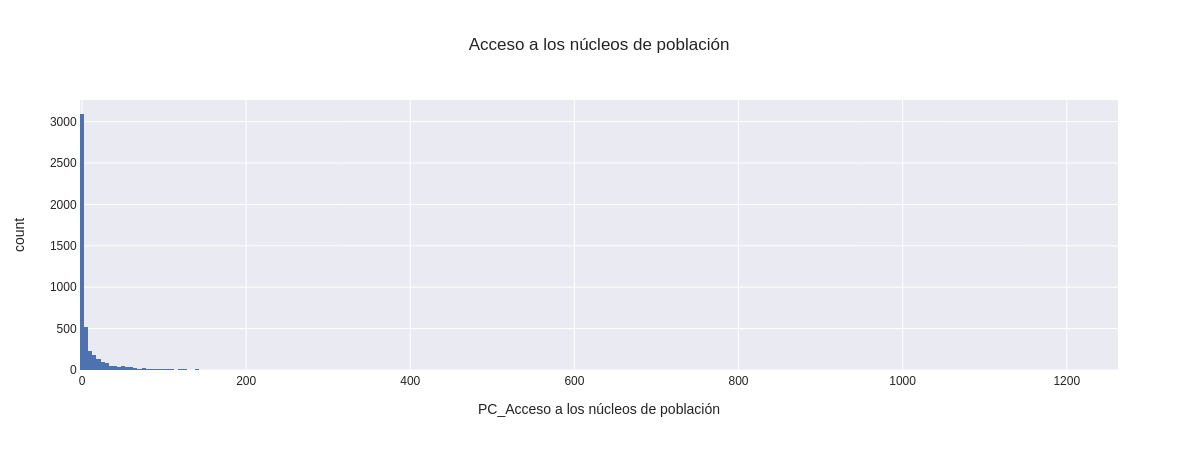

In [92]:
OB=df_final_pob.columns[7]

fig=px.histogram(df_final_pob, x=f'PC_{OB}',nbins=400,template='seaborn',title=f'{OB}',barmode='group')
fig.show()

In [108]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 0)



df_final_pob[['CCAA', 'Provincia','Nombre Ente Principal','Código Ente Principal','Población 2018',
              'TOTAL', 'PC_TOTAL',OB,f'PC_{OB}']].sort_values(by=f'PC_{OB}', ascending=False).head(10).T

,577,556,4893,4769,3413,3531,3598,3494,767,3543
CCAA,Andalucía,Andalucía,Comunitat Valenciana,Comunitat Valenciana,Cataluña,Cataluña,Cataluña,Cataluña,Aragón,Cataluña
Provincia,Málaga,Málaga,Castellón / Castelló,Alicante / Alacant,Girona,Lleida,Lleida,Lleida,Huesca,Lleida
Nombre Ente Principal,Parauta,Faraján,Villores,Tollos,Torrent,Guixers,Sarroca de Bellera,Bòrdes (Es),Montanuy,Lles de Cerdanya
Código Ente Principal,01-29-077-AA-000,01-29-052-AA-000,17-12-137-AA-000,17-03-130-AA-000,09-17-197-AA-000,09-25-111-AA-000,09-25-201-AA-000,09-25-057-AA-000,02-22-157-AA-000,09-25-127-AA-000
Población 2018,253,248,42,56,165,138,120,266,215,255
TOTAL,454587,273486,90310.8,67214.7,298063,95711.5,117020,295705,948738,756651
PC_TOTAL,1796.79,1102.77,2150.26,1200.26,1806.44,693.562,975.168,1111.67,4412.74,2967.26
Acceso a los núcleos de población,318654,185880,28782.9,37651,108174,88580.4,70584.9,154157,117417,135488
PC_Acceso a los núcleos de población,1259.5,749.515,685.306,672.339,655.602,641.887,588.207,579.536,546.127,531.325


In [24]:
# pd.set_option('display.max_columns', None)

# df_final_pob.loc[(df_final_pob['Población 2018']>11000)&(df_final_pob['Población 2018']<11200)]

In [38]:
df_indicadores.loc[(df_indicadores['Código Ente Principal']=='12-28-068-AA-000')&(df_indicadores['Descripción']==OB)]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
3589,Madrid,12-28-068-AA-000,Ayuntamiento,Guadarrama,"Abastos, mercados, lonjas",Nº puestos,1.0
3590,Madrid,12-28-068-AA-000,Ayuntamiento,Guadarrama,"Abastos, mercados, lonjas",Superficie total en metros cuadrados,1.0


# MELT

In [61]:
df_final_pob_melt=pd.melt(df_final_pob, id_vars=df_final_pob.columns[0:5],value_vars=df_final_pob.columns[5:48],
        var_name='Descripción',value_name='coste_efectivo')



df_final_pob_melt['coste_efectivo'].sum()



28641291941.31

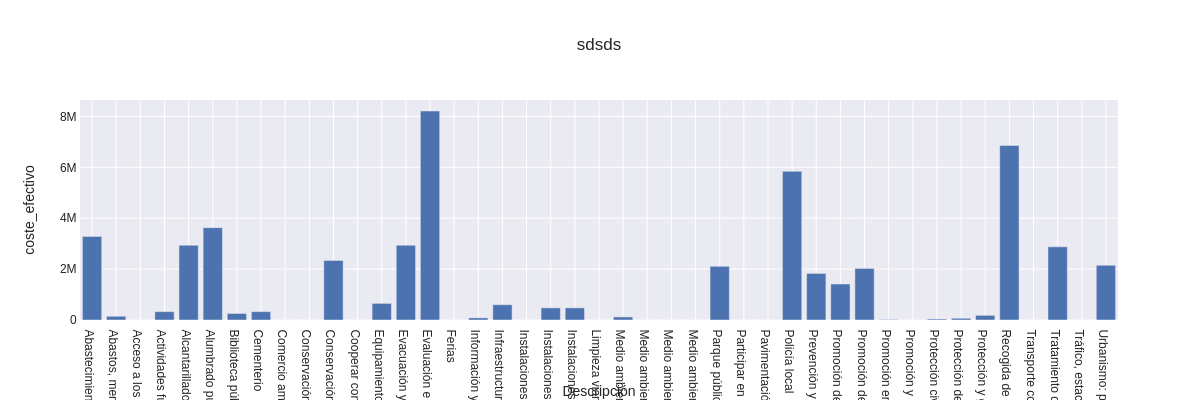

In [102]:
graph=df_final_pob_melt.loc[(df_final_pob_melt['Nombre Ente Principal']=='Lugo')]


fig=px.bar(graph,x='Descripción', y='coste_efectivo',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



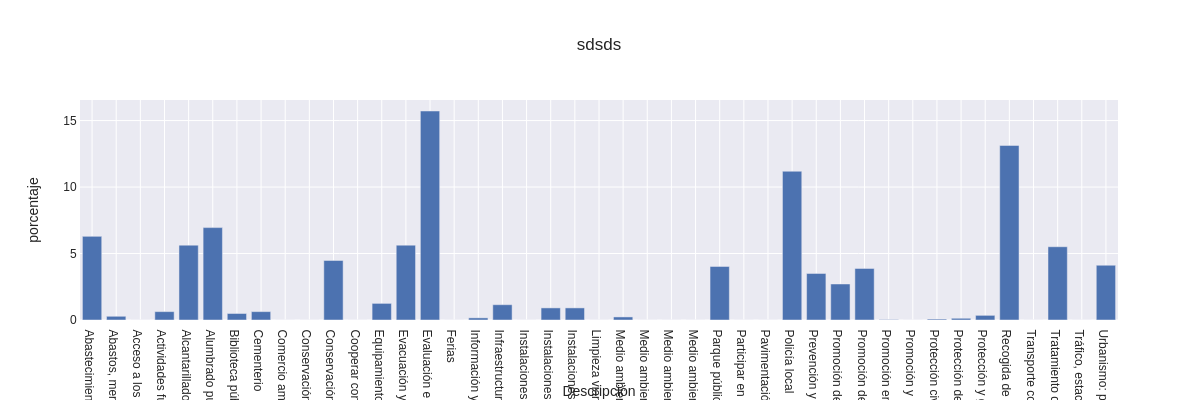

In [103]:
def porcentaje(df):
    df['porcentaje']=df.apply(lambda new: round(new['coste_efectivo']/df['coste_efectivo'].sum()*100,2), axis=1)
    return df

graph_porc=porcentaje(graph)


fig=px.bar(graph_porc,x='Descripción', y='porcentaje',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

In [107]:
df_indicadores.loc[(df_indicadores['Nombre Ente Principal']=='Lugo')&(df_indicadores['Descripción']=='Policía local')]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
5472,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,117.0
5473,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,25.0
5514,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,0.0
5515,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,0.0
